### Item 1

Research about the Spectral Clustering method, and answer the following questions:

### a. In which cases might it be more useful to apply?

Spectral clustering is a powerful technique used in data clustering and dimensionality reduction. It's particularly useful in various cases where traditional clustering methods like k-means may not perform well. Here are some situations in which spectral clustering can be more useful:

- Non-Convex Clusters
- Graph-Based Data
- Disconnected Clusters
- Unequal Cluster Sizes
- High-Dimensional Data
- Eigenstructure Exploration
- Manifold Learning
- Noisy Data

### b. What are the mathematical fundamentals of it?

It is based on the eigenvalues and eigenvectors of a similarity or affinity matrix. The key mathematical concepts involved are:

1. Affinity or Similarity Matrix (W): Spectral clustering starts with a similarity or affinity matrix, W, which encodes the pairwise similarity between data points. This matrix can be constructed using various metrics like Gaussian kernel, cosine similarity, or k-nearest neighbors

2. Graph Representation: The affinity matrix W is often used to construct a graph, where each data point corresponds to a node, and the edges represent the pairwise similarities. This can be an undirected or weighted graph.

<center>
  <img src="WMatrix.png" alt="W Matrix">

  **W Matrix**
</center>


3. Laplacian Matrix (L): Spectral clustering typically employs the Laplacian matrix, L, which is derived from the affinity matrix. There are two common types of Laplacian matrices:
    - Unnormalized Laplacian (L = D - W): Here, D is a diagonal matrix representing the degree (sum of edge weights) of each node.
    - Normalized Laplacian (L_norm = I - D^(-1/2)WD^(-1/2)): This version of the Laplacian is normalized to account for varying degrees of nodes<br>

<center>
  <img src="DMatrix.png" alt="D Matrix">

  **D Matrix**
</center>

<center>
  <img src="LMatrix.png" alt="D Matrix">

  **L Matrix**
</center>

4. Eigenvalue Decomposition: The next step involves computing the eigenvalues and eigenvectors of the Laplacian matrix. You can do this using techniques like the Power Iteration method or specialized numerical libraries.

5. Eigenvalue Ordering: Once you have the eigenvalues and corresponding eigenvectors, you typically sort them in ascending order. The eigenvector associated with the second smallest eigenvalue is particularly important in spectral clustering.

6. Dimension Reduction: Often, you perform dimensionality reduction by selecting the top k eigenvectors corresponding to the k smallest eigenvalues, forming a k-dimensional subspace.

7. Clustering: Finally, you can apply standard clustering techniques (e.g., k-means) to the data points represented in the reduced eigenvector space to obtain the final clusters.

The choice of affinity matrix, Laplacian type (unnormalized or normalized), and the number of eigenvectors to retain (k) can impact the performance of spectral clustering. Additionally, there are variations and extensions of spectral clustering, such as normalized cuts and ratio cuts, that further refine the clustering process.

### c. What is the algorithm to compute it?

The algorithm to compute spectral clusters can be summarized in the following steps:

1. Construct a Similarity or Affinity Matrix: Begin by defining a similarity or affinity matrix that quantifies the pairwise similarity between data points in your dataset. Common choices for similarity measures include Gaussian (RBF) kernel, k-nearest neighbors, or other similarity metrics depending on the nature of your data.

2. Create the Laplacian Matrix: Next, you'll compute the Laplacian matrix from the affinity matrix. There are two types of Laplacian matrices commonly used in spectral clustering: the unnormalized Laplacian and the normalized Laplacian. The normalized Laplacian is often preferred as it can handle datasets of varying densities.

3. Eigenvalue Decomposition: Compute the eigenvalues and eigenvectors of the Laplacian matrix. These eigenvalues and eigenvectors will provide information about the data's underlying structure.

4. Select Eigenvectors: Choose a specific number of eigenvectors corresponding to the smallest eigenvalues. The number of eigenvectors is typically equal to the number of clusters you want to find, or you can use heuristics like the gap statistic to determine the optimal number of clusters.

5. Form a New Data Representation: Use the selected eigenvectors to create a new lower-dimensional representation of the data. Each data point is now represented as a vector in this reduced space.

6. Apply Clustering Algorithm: Apply a standard clustering algorithm (e.g., K-means) to the new representation of the data. The number of clusters should match the number of eigenvectors you selected.

7. Assign Data Points to Clusters: After clustering, assign each data point to one of the clusters based on its membership in the lower-dimensional space.

8. Post-processing: Optionally, you can perform post-processing steps such as refining the cluster assignments or evaluating the quality of the clusters using relevant metrics.

### d. Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

It is related in two aspects, the calculation of the eigenvectors and eigenvalues of the Laplacian matrix and the ordering of the eigenvalues from the largest to the smallest which allowed to obtain the highest variability in the first components. In addition, a clustering algorithm such as K-means is applied.

### Item 2
Research about the DBSCAN method, and answer the following questions:

### a. In which cases might it be more useful to apply?

It is particularly useful in cases where the data has the following characteristics:

1. **Unknown Number of Clusters**: DBSCAN can automatically detect the number of clusters in the data without requiring you to specify it in advance. This makes it handy when you don't have prior knowledge about the data's underlying structure.

2. **Non-Globular Shapes**: Unlike some other clustering algorithms like K-Means, DBSCAN can identify clusters with irregular shapes. It can find clusters that are not necessarily spherical or convex, making it useful in scenarios where the clusters have complex, non-linear shapes.

3. **Robust to Noise**: DBSCAN is robust to outliers and noise in the data. It distinguishes between core points (points that are densely packed within a cluster), border points (points that are on the fringes of a cluster), and noise points (isolated points that don't belong to any cluster). This makes it effective in situations where there is a significant amount of noise in the data.

4. **Varying Cluster Densities**: DBSCAN can handle clusters with varying densities. It doesn't assume that all clusters have the same density, which is a limitation in some other clustering algorithms.

5. **Doesn't Require Predefined Cluster Shape**: DBSCAN doesn't assume any specific shape for clusters, which means it can be used effectively in cases where clusters have different shapes and sizes.

6. **Appropriate for Spatial Data**: Due to its origin in spatial databases, DBSCAN is well-suited for applications involving geographic data, such as GPS coordinates, as well as other domains where spatial relationships matter.

7. **Scalability**: DBSCAN is relatively scalable and can handle large datasets, although its computational complexity is generally higher than simpler clustering algorithms like K-Means.

8. **Minimal Hyperparameter Tuning**: While DBSCAN has hyperparameters like ε (epsilon) for defining the radius and minPts for the minimum number of points required to form a cluster, these parameters can often be set based on domain knowledge or through trial and error, without the need for extensive tuning.

In summary, DBSCAN is a versatile clustering algorithm that is particularly useful when you have data with varying densities, irregular shapes, and noise. It's a go-to choice when you want to discover clusters without specifying the number of clusters in advance and when you need a clustering algorithm that can handle complex, real-world datasets.

### b. What are the mathematical fundamentals of it?

The algorithm works by grouping together data points that are close to each other in the feature space, while marking data points that are isolated as noise. Here's an overview of the algorithm:

1. Parameter Selection:

    - Epsilon (ε): This parameter defines the radius within which to search for nearby data points. It's also known as the "neighborhood" parameter.
    - Minimum Points (MinPts): This parameter specifies the minimum number of data points required to form a dense region or cluster.

2. Core Points: A data point is considered a core point if there are at least MinPts data points (including itself) within a distance of ε from it. Core points are at the heart of clusters.

3. Border Points: A data point is considered a border point if it is within ε distance of a core point but does not have enough neighbors to be considered a core point itself. Border points are on the edges of clusters.

4. Noise Points: Data points that are neither core points nor border points are classified as noise points or outliers.

5. Cluster Formation:
    - DBSCAN begins by picking an arbitrary data point. If it's a core point, a cluster is formed by expanding it with all reachable core points (and their reachable core points, and so on) within ε distance.
    - This process continues until no more core points can be added to the cluster.

6. Repeat for Unvisited Points: The algorithm repeats the cluster formation process for unvisited data points until all data points are visited.

7. Result: The result is a collection of clusters, each containing core points and border points. Noise points are not part of any cluster.

c. Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

The relationship is found in some applications, for example in non-convex or non-linear clsuters, in data that present noise and high dimensionality in the data.

### Item 3
### What is the elbow method in clustering? And which flaws does it pose to assess quality?

The elbow method is a popular technique used in clustering to determine the optimal number of clusters for a dataset. It helps identify the point at which adding more clusters does not significantly improve the quality of clustering and, therefore, can be considered as an appropriate number of clusters to use.

**Flaws and limitations**
1. **Subjectivity**: Determining the exact "elbow point" can be subjective, as it may not always be a clear and distinct point on the plot. Different individuals may interpret the results differently.

2. **Doesn't work for all data**: The elbow method assumes that the clusters are spherical and equally sized, which may not be the case for all datasets. In situations where clusters have irregular shapes or varying sizes, the method may not perform well.

3. **Dependent on the metric**: The choice of clustering metric (e.g., WCSS, silhouette score) can affect the results. Different metrics may yield different optimal cluster numbers.

4. **Sensitivity to initialization**: The choice of initial cluster centers in algorithms like k-means can impact the results, potentially leading to different "elbow points."

5. **No guarantee of the true optimal number of clusters**: The elbow method provides a heuristic for selecting the number of clusters, but it does not guarantee the discovery of the true underlying structure in the data.

### Item 4

a. Unsupervides python package K-means

In [53]:
# Libraries
from API import KMEANS_Scratch
from API import KMEDOIDS_Scratch
import importlib
importlib.reload(KMEANS_Scratch)
importlib.reload(KMEDOIDS_Scratch)
from sklearn.datasets import make_blobs


In [54]:
# Dataset to prove
X, y = make_blobs(
n_samples=750,
n_features=2,
centers=5,
cluster_std=0.8,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1)

[1 2 2 3 0 0 2 2 1 2 3 2 2 1 2 2 3 3 2 2 3 2 1 0 2 2 0 3 2 0 2 3 2 0 2 3 0
 2 1 2 2 3 1 1 0 1 0 1 1 1 2 2 3 3 0 2 1 1 2 0 2 0 1 2 2 2 2 1 2 0 2 3 1 2
 1 3 0 2 3 2 0 2 1 0 3 3 0 2 2 2 2 2 1 1 2 2 1 2 3 2 3 2 3 0 1 1 2 1 0 3 3
 3 2 2 1 1 3 1 2 0 3 2 2 1 2 3 1 2 1 0 2 2 0 2 2 2 1 3 3 1 2 0 0 2 1 2 1 0
 3 3 1 0 1 0 3 3 0 0 2 2 0 0 1 2 2 3 2 0 2 3 2 1 2 2 1 2 0 3 2 2 2 0 0 1 1
 3 3 2 0 2 3 1 3 3 0 2 2 2 2 2 2 2 1 2 3 2 0 3 2 1 3 2 3 3 2 0 3 1 2 1 2 0
 2 1 0 2 1 2 2 2 3 0 0 0 3 2 3 2 1 2 2 0 0 1 2 2 1 2 0 1 0 2 2 0 2 2 0 2 0
 0 3 1 0 2 1 2 2 1 1 1 2 1 2 2 3 2 1 1 2 1 2 1 3 3 0 2 2 1 3 2 2 2 1 3 0 0
 0 0 1 0 2 2 0 0 2 1 0 1 0 2 3 2 1 0 2 2 3 3 3 0 1 2 1 2 3 1 2 1 1 1 2 1 2
 1 2 3 0 2 1 1 2 2 3 2 3 2 3 3 1 3 2 2 2 0 2 2 2 0 2 2 3 3 1 0 1 0 0 0 2 2
 1 2 2 0 0 2 1 0 2 2 3 0 1 2 3 1 2 0 3 2 2 2 2 2 3 0 2 3 3 0 2 3 1 1 3 1 3
 2 3 1 1 0 2 2 1 2 2 2 0 3 1 0 2 2 1 1 3 1 2 3 3 0 2 0 0 3 2 2 1 2 2 2 1 1
 2 2 2 0 2 0 1 3 3 2 0 0 2 2 1 0 3 1 2 0 0 3 2 3 2 0 0 2 3 0 2 2 0 3 3 0 3
 3 2 0 1 1 1 2 1 1 3 2 0 

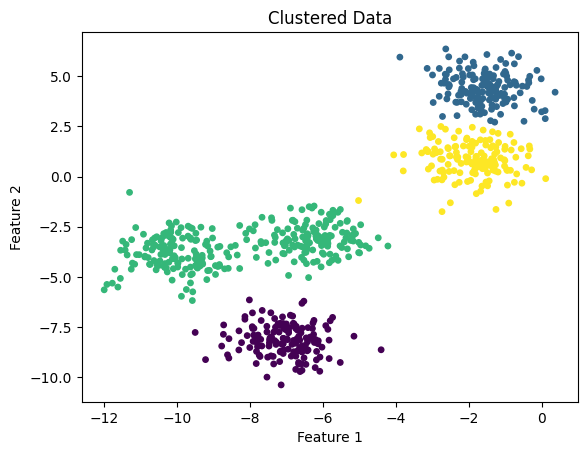

In [57]:
# Initialize KMeans
kmeans = KMEANS_Scratch.KMeans(n_clusters=4,max_iters=1000)

# fit the data & predict cluster labels
kmeans.fit(X)
predicted_labels,dist,itera = kmeans.predict(X)
print(predicted_labels)
print(predicted_labels.shape)
print(dist.shape)
print(dist)
print('iteraciones',itera)


plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=15)    
plt.title("Clustered Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

b. Unsupervides python package K-medoids

[3 0 2 2 1 1 2 2 3 0 2 0 0 2 0 0 2 2 0 0 2 0 3 1 2 0 1 2 0 1 0 2 0 1 0 3 1
 0 3 0 0 2 3 3 1 3 1 3 3 3 0 0 2 2 1 0 3 3 0 1 1 1 3 2 2 0 2 3 0 1 0 2 2 0
 3 2 1 0 2 0 1 2 3 1 2 2 1 1 0 0 0 2 3 3 0 0 3 0 2 0 2 1 2 1 3 3 0 3 1 2 2
 2 0 0 3 3 2 2 0 1 2 2 0 3 0 2 3 2 3 1 0 2 1 0 0 0 3 2 2 3 0 1 1 2 3 0 3 1
 2 2 3 1 3 1 2 2 1 1 1 2 1 1 3 0 0 2 0 1 2 2 0 3 2 0 3 0 1 2 1 2 0 1 1 3 3
 2 2 2 1 0 2 3 2 2 1 0 0 0 0 0 0 0 3 0 2 0 1 2 0 3 2 0 2 2 0 1 2 3 2 3 0 1
 1 3 1 2 3 0 0 2 2 1 1 1 2 0 2 2 3 0 0 1 1 3 0 2 3 2 1 3 1 0 0 1 1 0 1 0 1
 1 2 3 1 0 3 0 0 3 3 3 2 3 0 0 2 0 3 3 0 3 1 3 2 2 1 0 0 3 2 0 0 0 3 2 1 1
 1 1 3 1 0 0 1 1 2 3 1 3 1 0 2 0 3 1 0 2 2 2 2 1 3 0 3 2 2 3 0 3 3 3 0 3 0
 3 0 2 1 2 3 3 0 0 2 2 2 0 2 2 3 2 0 2 2 1 0 0 2 1 0 0 2 2 3 1 3 1 1 1 0 0
 3 0 1 1 1 0 3 1 0 0 2 1 3 2 2 3 0 1 2 0 0 0 0 2 2 1 2 2 2 1 0 2 3 3 2 3 2
 0 2 3 3 1 0 0 3 0 2 0 1 2 3 1 0 0 3 3 2 3 0 2 2 1 0 1 1 2 0 0 3 1 0 0 3 3
 0 0 0 1 1 1 3 2 2 0 1 1 0 1 3 1 2 3 1 1 1 2 2 2 0 1 1 0 2 1 0 0 1 2 2 1 2
 2 0 1 3 3 3 0 3 3 2 0 1 

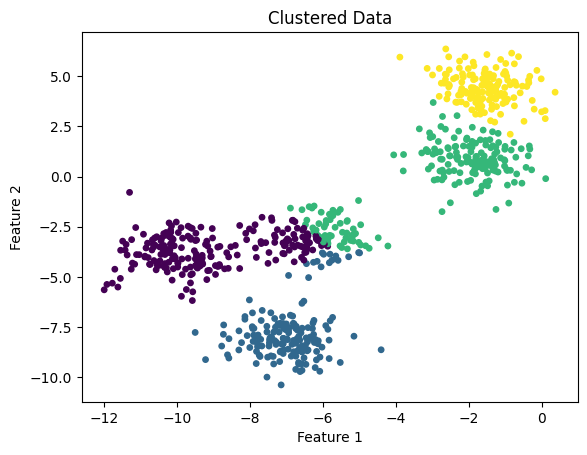

In [58]:
# Initialize KMeans
kmedoids = KMEDOIDS_Scratch.Kmedoids(n_clusters=4, max_iters=1000)

# fit the data & predict cluster labels
kmedoids.fit(X)
medoids, labels, itera = kmedoids.predict(X)
print(labels)
print(labels.shape)
print(medoids)
print('iteraciones',itera)


plt.scatter(X[:, 0], X[:, 1], c=labels, s=15)    
plt.title("Clustered Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Item 5
a. Use the following code snippet to create scattered data X

In [59]:
# Import Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import math

In [60]:
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1)

b. Plot the resulting dataset. How many clusters are there? How far are they from one another?

It seem that there are 4 clusters. To mesuare the distance between each clusters, I calculate the centroid of each cluster and the distance between them. It can be see in table at the end of the numeral, where the largest distance is between centroid 0 and 2 with 13.68 and the smallest distance is between 1 and 3 with 3.93.

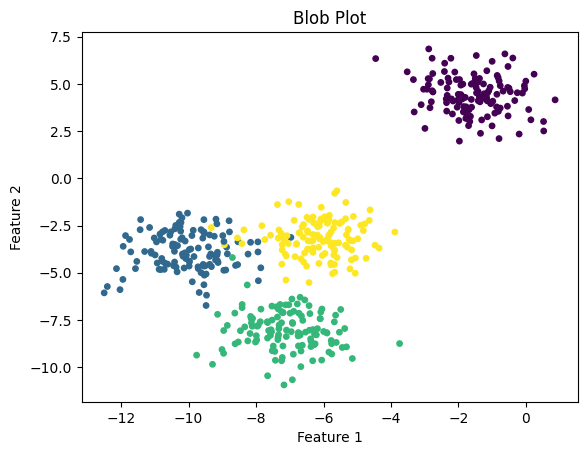

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=y,s=15)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Blob Plot')
plt.show()

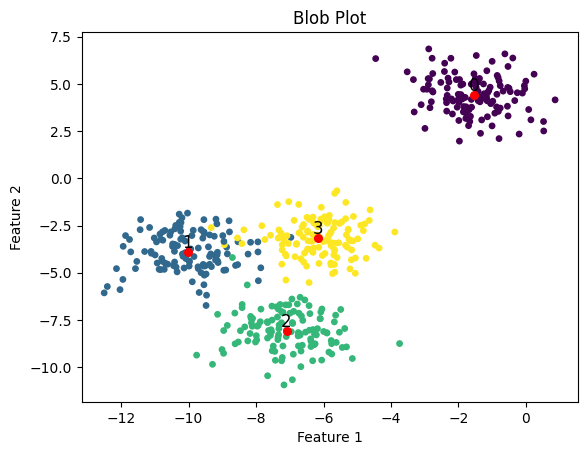

In [66]:
ncentroids=np.unique(y)
n_samples, n_features = X.shape
n_clusters=len(ncentroids)
centroids = np.zeros((n_clusters, n_features))
for i in ncentroids:
    centroids[i] = np.mean(X[y== i], axis=0)
    # centroid = calculate_centroid(points)
    # print("Centroid:", centroid)

plt.scatter(X[:, 0], X[:, 1], c=y,s=15)
plt.scatter(centroids[:, 0],centroids[:, 1],c='red',s=30)

for i in ncentroids:
    plt.text(centroids[i,0], centroids[i,1], str(i), fontsize=12, ha='center', va='bottom')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Blob Plot')
plt.show()

In [73]:
# Distance calcultion between each couple of centroids
print(centroids)
print(centroids.shape)
distances = np.zeros((centroids.shape[0], centroids.shape[0]))
for i in range(centroids.shape[0]):
    point1=centroids[i]
    print(point1)
    for i1 in range(i+1,centroids.shape[0]):
        point2=centroids[i1]
        distance=np.linalg.norm(point1 - point2)
        distances[i,i1]=distance
        distancemat = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
        distances[i1,i]=distance

print(distances)

[[ -1.54234022   4.43517599]
 [-10.02413149  -3.87640671]
 [ -7.09616544  -8.06991291]
 [ -6.15318509  -3.16286287]]
(4, 2)
[-1.54234022  4.43517599]
[-10.02413149  -3.87640671]
[-7.09616544 -8.06991291]
[-6.15318509 -3.16286287]
[[ 0.         11.87531853 13.68291719  8.88763663]
 [11.87531853  0.          5.11453609  3.93616194]
 [13.68291719  5.11453609  0.          4.9968342 ]
 [ 8.88763663  3.93616194  4.9968342   0.        ]]


c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

##### Silhouette K-MEANS

In [104]:
# Libraries
from sklearn.metrics import silhouette_samples, silhouette_score

C:\Users\alejo\AppData\Local\Temp\ipykernel_4084\4222971556.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / k)
C:\Users\alejo\AppData\Local\Temp\ipykernel_4084\4222971556.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / k)
C:\Users\alejo\AppData\Local\Temp\ipykernel_4084\4222971556.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(

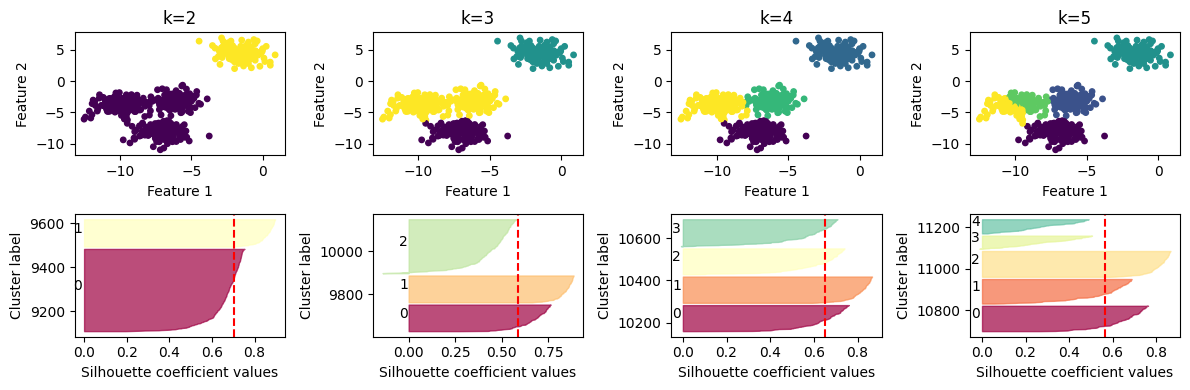

Text(0.5, 1.0, 'Preformance of Silhouette with variation of k')

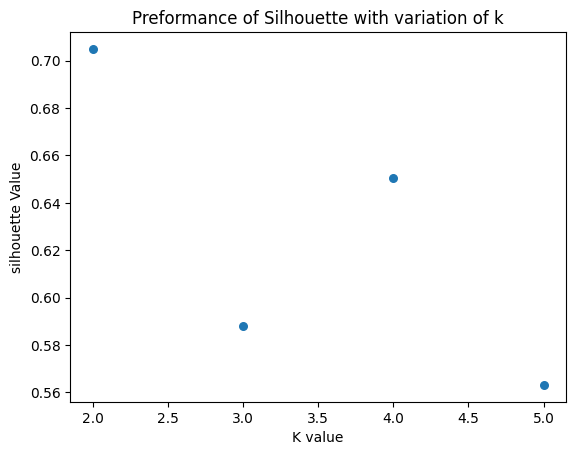

In [109]:
List_K=[]
List_Silh=[]

fig, axs=plt.subplots(2, 4,figsize=(12, 4))
for k in range(2,6):
    #print(k)
    # Initialize KMeans
    kmeans = KMEANS_Scratch.KMeans(n_clusters=k,max_iters=1000)

    # fit the data & predict cluster labels
    kmeans.fit(X)
    labels,dist,itera = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, labels)

    # Get sample silhoutte_values
    sample_silhouette_values = silhouette_samples(X, labels)

    # Plot clusters
    axs[0,k-2].scatter(X[:, 0], X[:, 1], c=labels,s=15)
    axs[0,k-2].set_xlabel('Feature 1')
    axs[0,k-2].set_ylabel('Feature 2')
    axs[0,k-2].set_title('k=' + str(k))

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.get_cmap("Spectral")(float(i) / k)
        axs[1,k-2].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axs[1,k-2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    # axs[1,k-2].set_title("Silhouette Plot")
    axs[1,k-2].set_xlabel("Silhouette coefficient values")
    axs[1,k-2].set_ylabel("Cluster label")
    
    # Add some spacing between subplots
    plt.tight_layout()
    # The 2nd subplot is the silhouette scores visualization
    axs[1,k-2].axvline(x=silhouette_avg, color="red", linestyle="--")
    # axs[2,k-2].set_yticks([])  # Clear the y-axis labels
    # axs[2,k-2].set_xlim([-0.1, 1])
    # axs[2,k-2].set_xlabel("Silhouette Score")
    # axs[2,k-2].set_title("Silhouette Score vs. Cluster")


    List_K.append(k)
    List_Silh.append(silhouette_avg)

plt.show()
plt.scatter(List_K, List_Silh,s=30)
# Add labels and a title
plt.xlabel('K value')
plt.ylabel('silhouette Value')
plt.title('Preformance of Silhouette with variation of k')

##### Silhouette K-MEDOIDS

C:\Users\alejo\AppData\Local\Temp\ipykernel_4084\3182646950.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / k)
C:\Users\alejo\AppData\Local\Temp\ipykernel_4084\3182646950.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / k)
C:\Users\alejo\AppData\Local\Temp\ipykernel_4084\3182646950.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(

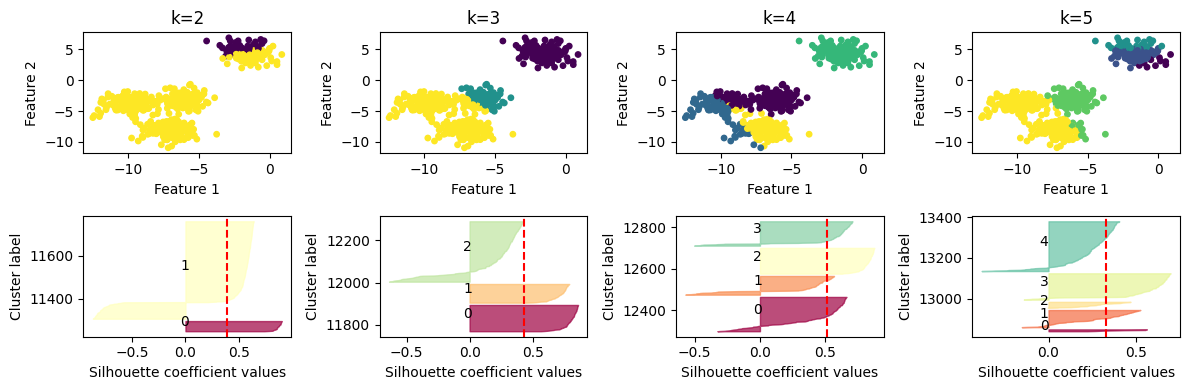

Text(0.5, 1.0, 'Preformance of Silhouette with variation of k')

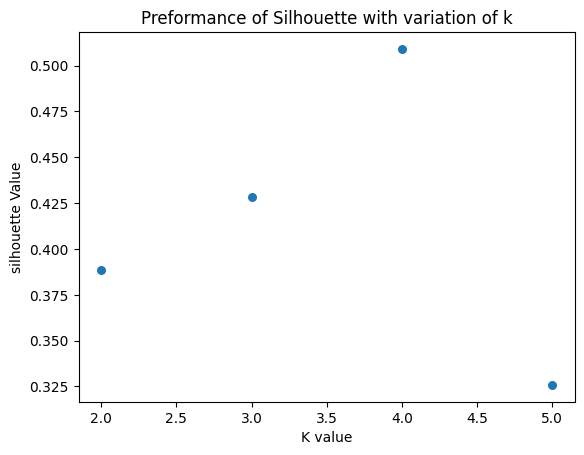

In [119]:
List_K=[]
List_Silh=[]

fig, axs=plt.subplots(2, 4,figsize=(12, 4))
for k in range(2,6):
    #print(k)
    # Initialize KMeans
    kmedoids = KMEDOIDS_Scratch.Kmedoids(n_clusters=k,max_iters=1000)

    # fit the data & predict cluster labels
    kmedoids.fit(X)
    medoids, labels, itera = kmedoids.predict(X)
    silhouette_avg = silhouette_score(X, labels)

    # Get sample silhoutte_values
    sample_silhouette_values = silhouette_samples(X, labels)

    # Plot clusters
    axs[0,k-2].scatter(X[:, 0], X[:, 1], c=labels,s=15)
    axs[0,k-2].set_xlabel('Feature 1')
    axs[0,k-2].set_ylabel('Feature 2')
    axs[0,k-2].set_title('k=' + str(k))

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.get_cmap("Spectral")(float(i) / k)
        axs[1,k-2].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axs[1,k-2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    # axs[1,k-2].set_title("Silhouette Plot")
    axs[1,k-2].set_xlabel("Silhouette coefficient values")
    axs[1,k-2].set_ylabel("Cluster label")
    
    # Add some spacing between subplots
    plt.tight_layout()
    
    # The 2nd subplot is the silhouette scores visualization
    axs[1,k-2].axvline(x=silhouette_avg, color="red", linestyle="--")
    # axs[2,k-2].set_yticks([])  # Clear the y-axis labels
    # axs[2,k-2].set_xlim([-0.1, 1])
    # axs[2,k-2].set_xlabel("Silhouette Score")
    # axs[2,k-2].set_title("Silhouette Score vs. Cluster")


    List_K.append(k)
    List_Silh.append(silhouette_avg)

plt.show()
plt.scatter(List_K, List_Silh,s=30)
# Add labels and a title
plt.xlabel('K value')
plt.ylabel('silhouette Value')
plt.title('Preformance of Silhouette with variation of k')



d. What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?

Iterations can be implemented from 2 to 5 because 1 cluster returns error in silhouette scores. In the evaluation of K-means evaluation the best score is found at 2 and 4 values of k, this is because 3 clusters are very close and can be considered as 1. Also, the calculations with 4 cluster have good perfomrnace and it is expected because the sintetic data were constructed with 4 center. In adition, the k-medoids method has the best performance with 4 clusters. 

### Item 6

In [1]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
import numpy as np
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
dictData={}
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
dictData['noisy_circles']=noisy_circles
print('noisy_circles',type(noisy_circles))
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
dictData['noisy_moons']=noisy_moons
print('noisy_moons',type(noisy_moons))
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
dictData['blobs']=blobs
print('blobs',type(blobs))
no_structure = np.random.rand(n_samples, 2), None
dictData['no_structure']=no_structure
print('no_structure',type(no_structure))

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
dictData['aniso']=aniso
print('aniso',type(aniso))

# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
dictData['varied']=varied
print('varied',type(varied))

noisy_circles <class 'tuple'>
noisy_moons <class 'tuple'>
blobs <class 'tuple'>
no_structure <class 'tuple'>
aniso <class 'tuple'>
varied <class 'tuple'>


a. Plot the different datasets in separate figures. What can you say about them?

The noisy_circles and noisy_moons datasets can be clustered with k=2. The no_structure dataset has no clusters that can be identified and the data are equally sparse across space. The blobs, aniso and varied appear to have 3 cluster, although varied has a sparde cluster.

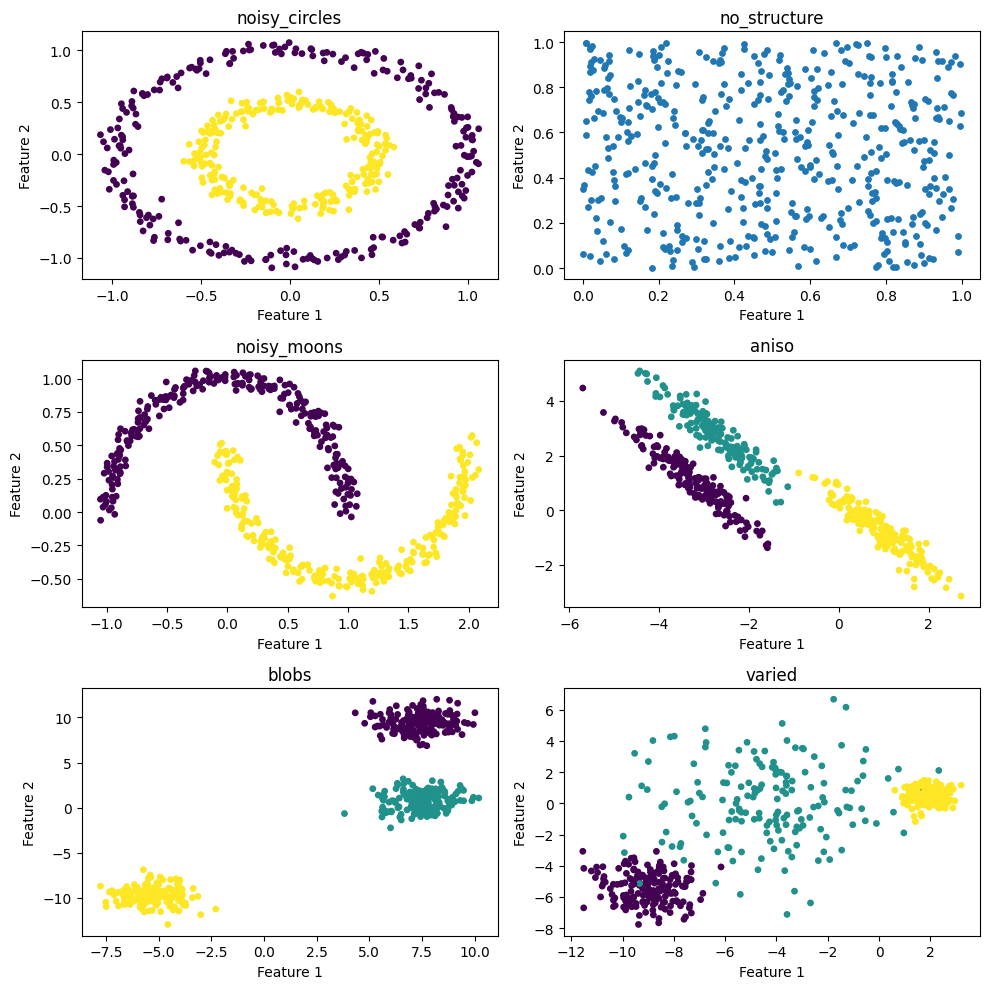

In [4]:
fig, axs=plt.subplots(3, 2,figsize=(10, 10))

cont=0
numaxis=0
for key, value in dictData.items():

    X=value[0]
    y=value[1]

    if key=='no_structure':
        axs[numaxis,cont].scatter(X[:, 0], X[:, 1],s=15)
    else:
        axs[numaxis,cont].scatter(X[:, 0], X[:, 1],c=y,s=15)

    axs[numaxis,cont].set_xlabel('Feature 1')
    axs[numaxis,cont].set_ylabel('Feature 2')
    axs[numaxis,cont].set_title(key)

    numaxis=numaxis+1

    if numaxis==3:
        cont=1
        numaxis=0

# Add some spacing between subplots
plt.tight_layout()
    


b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.

The table of results can seen at the end of the numeral . Using k=3, K-means, k-medoids and spectral clustering have similar results on average silhoutte value for the datasets where 3 clusters can be identified, as explained in numeral b. For noisy_moons and no_structure datasets the k-means method is the best compared to the others, although the average silhoutte is less than 0.5, indicating poor performance. The DBSCAN method has not perform well with any dataset.

In [42]:
# Libraries
from sklearn.cluster import KMeans
import pandas as pd
k=3
df_Results=pd.DataFrame()

df_Results['Dataset']=['noisy_circles','noisy_moons','blobs','no_structure','aniso','varied']

In [43]:
# Function to get cluster and plot the results
def Cluster_Plot(Model,tipo=0):
    List_Sil=[]
    fig, axs=plt.subplots(3, 2,figsize=(10, 10))

    cont=0
    numaxis=0

    for dataset, data in dictData.items():

        X=data[0]
        y=data[1]
        
        # Flag to exeute model with special parameters
        if tipo==0:
            Model.fit(X)
            labels = Model.labels_
        else:
            similarity_matrix = np.exp(-pairwise_distances(X, metric="euclidean") ** 2 / (2.0 * (1.0 ** 2)))
            labels = spectral_clustering.fit_predict(similarity_matrix)

        numlabels=list(set(labels))
        if len(numlabels)>1:
            silhouette_avg = silhouette_score(X, labels)
        else:
            silhouette_avg=1
        
        List_Sil.append(silhouette_avg)

        axs[numaxis,cont].scatter(X[:, 0], X[:, 1],c=labels,s=15)
        axs[numaxis,cont].set_xlabel('Feature 1')
        axs[numaxis,cont].set_ylabel('Feature 2')
        axs[numaxis,cont].set_title(key + '-' + 'Silhoutte: ' + str(silhouette_avg))

        numaxis=numaxis+1

        if numaxis==3:
            cont=1
            numaxis=0

        print('Dataset ' + dataset + ' Finished')

    # Add some spacing between subplots
    plt.tight_layout()
    
    return List_Sil

K-means

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Dataset noisy_circles Finished
Dataset noisy_moons Finished
Dataset blobs Finished
Dataset no_structure Finished
Dataset aniso Finished


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dataset varied Finished


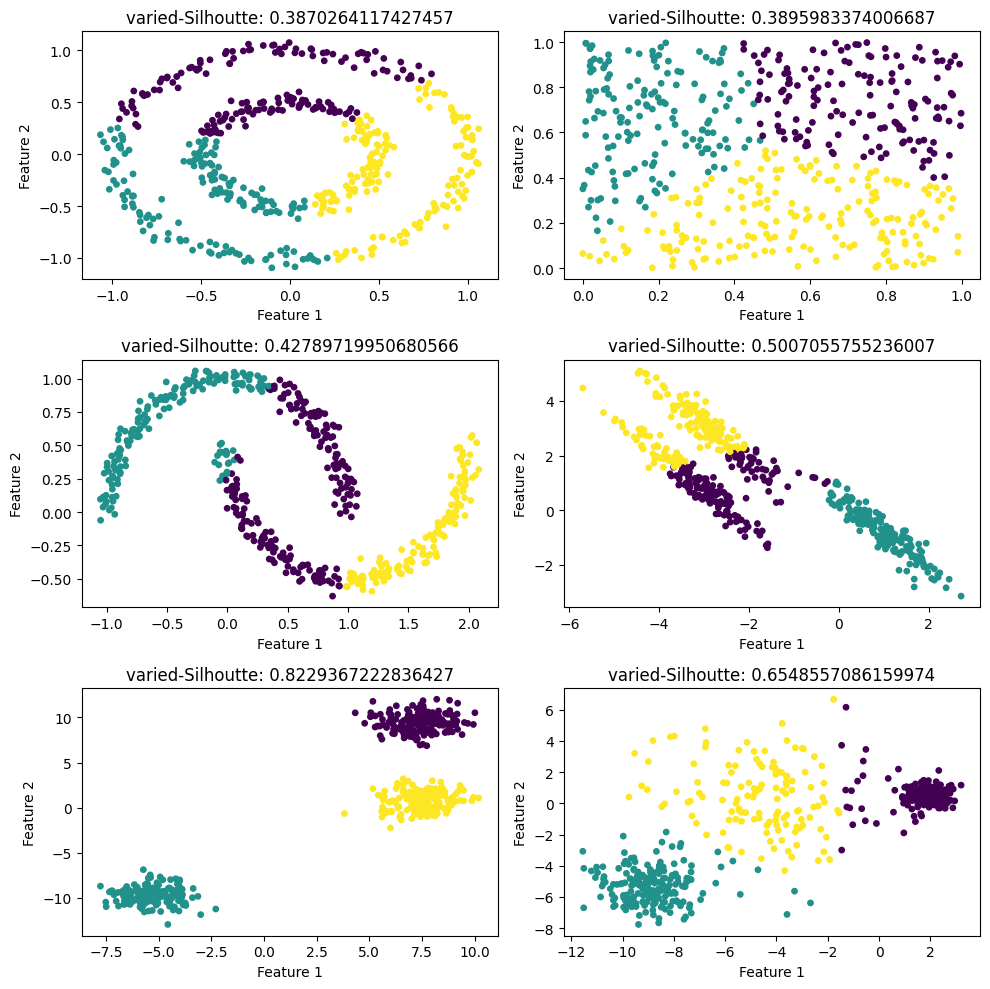

In [44]:

kmeans = KMeans(n_clusters=k, random_state=0)
results=Cluster_Plot(kmeans)
df_Results['KMeans']=results



K-medoids

Dataset noisy_circles Finished
Dataset noisy_moons Finished
Dataset blobs Finished
Dataset no_structure Finished
Dataset aniso Finished
Dataset varied Finished


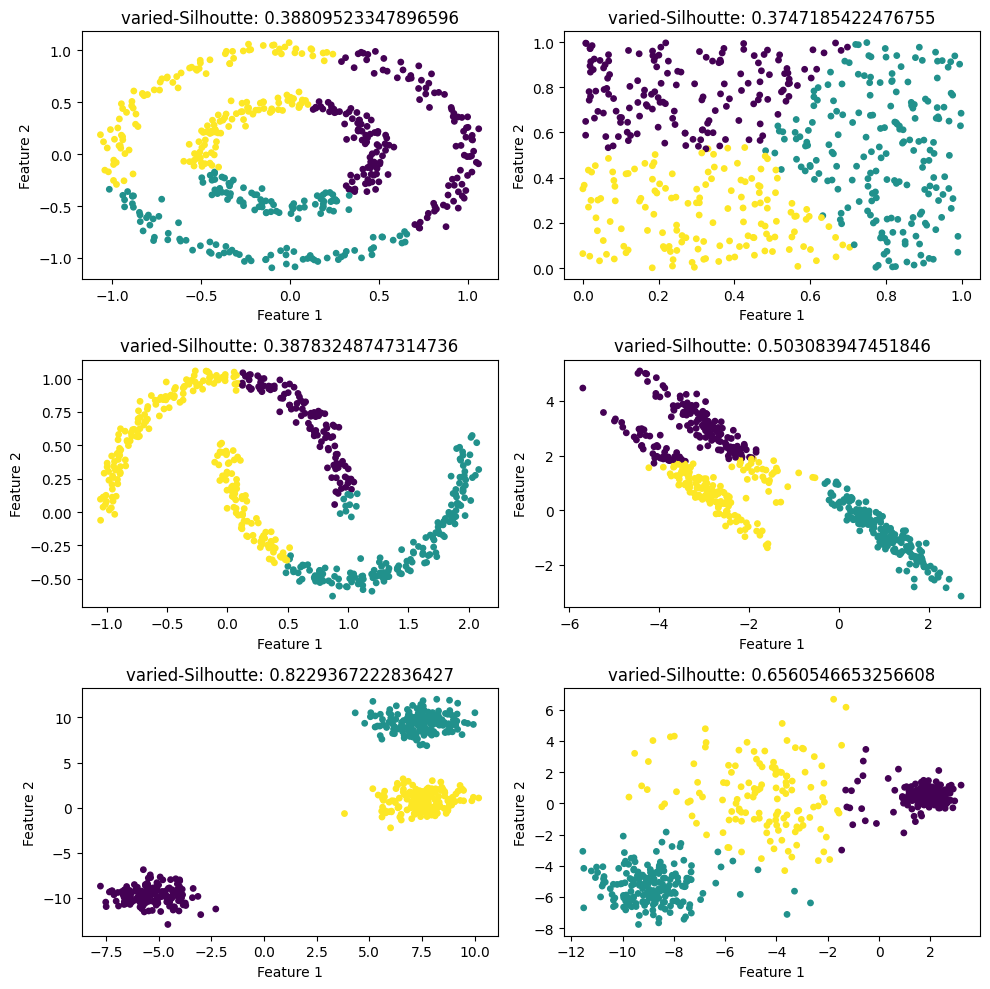

In [45]:
from sklearn_extra.cluster import KMedoids

kmedoid = KMedoids(n_clusters=k, random_state=0)
results=Cluster_Plot(kmedoid)
df_Results['KMedoids']=results

DBSCAN

Dataset noisy_circles Finished
Dataset noisy_moons Finished
Dataset blobs Finished
Dataset no_structure Finished
Dataset aniso Finished
Dataset varied Finished


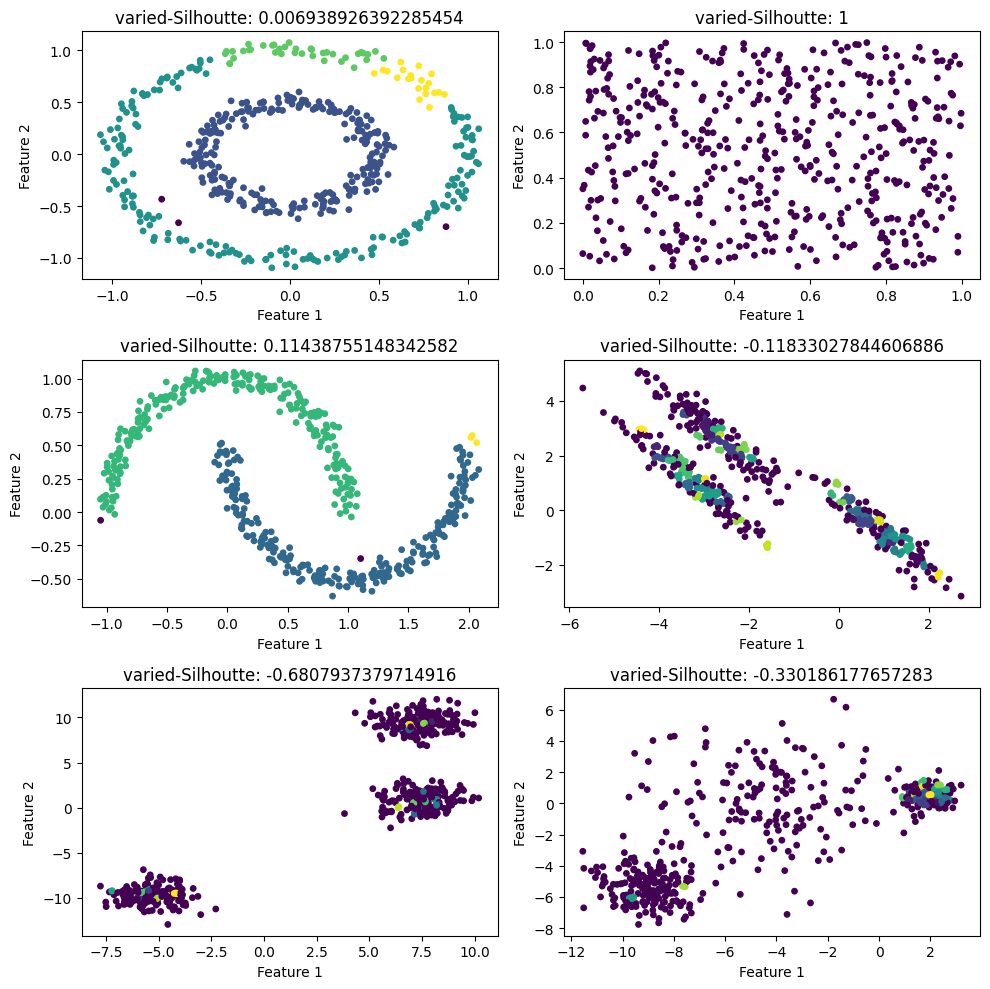

In [46]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=3)
results=Cluster_Plot(dbscan)
df_Results['DBSCAN']=results

Spectral Clustering

Dataset noisy_circles Finished
Dataset noisy_moons Finished
Dataset blobs Finished
Dataset no_structure Finished
Dataset aniso Finished
Dataset varied Finished


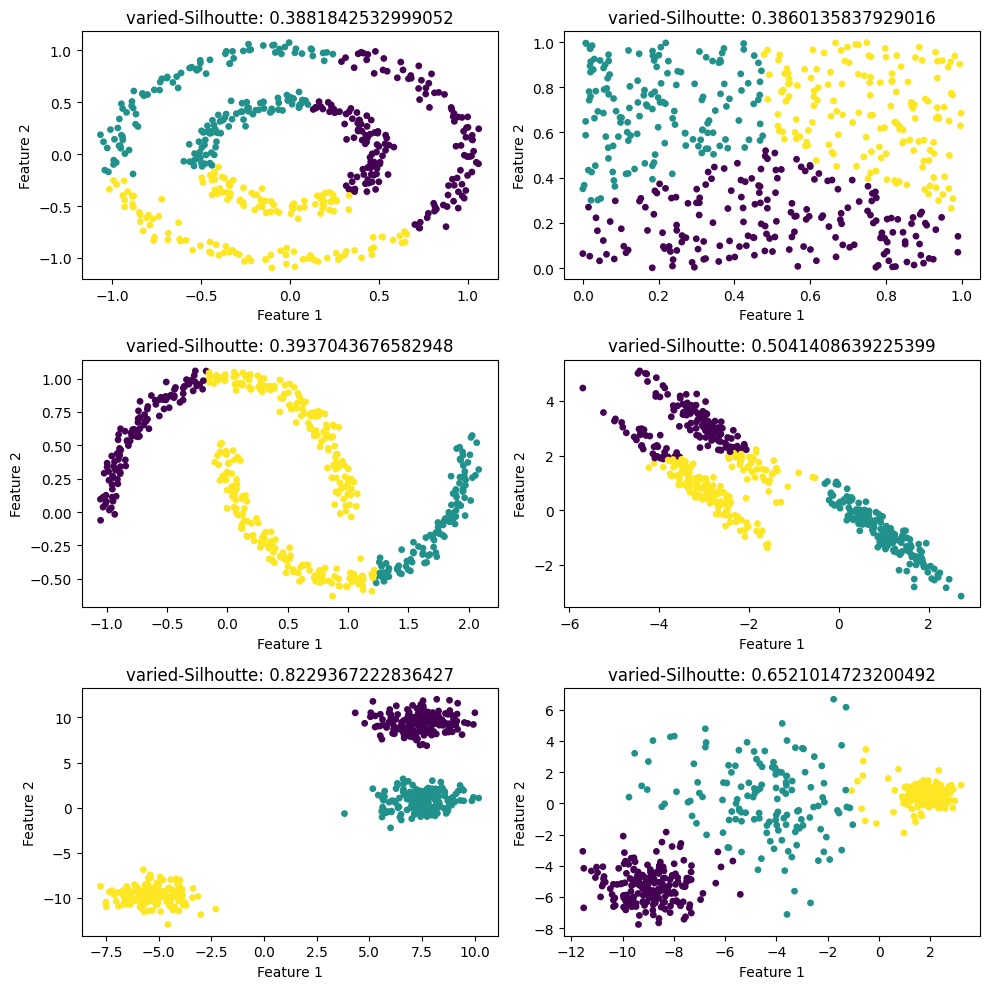

In [47]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
k=3
spectral_clustering = SpectralClustering(n_clusters=k, affinity='precomputed', eigen_solver='arpack', random_state=0)
results=Cluster_Plot(spectral_clustering,1)
df_Results['spectral_clustering']=results


In [48]:
df_Results

,Dataset,KMeans,KMedoids,DBSCAN,spectral_clustering
0,noisy_circles,0.387026,0.388095,0.006939,0.388184
1,noisy_moons,0.427897,0.387832,0.114388,0.393704
2,blobs,0.822937,0.822937,-0.680794,0.822937
3,no_structure,0.389598,0.374719,1.000000,0.386014
4,aniso,0.500706,0.503084,-0.118330,0.504141
5,varied,0.654856,0.656055,-0.330186,0.652101
